# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

In [3]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [4]:
def gd(X, y, mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                             # чтобы он не стемился к нулю
                    ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_gd = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0])
        errors_gd.append(mserror(X, new_w, y))
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_gd[-1] - errors_gd[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_gd   

In [5]:
def st(X,y,mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                      # чтобы он не стемился к нулю
              ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_St = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) /
                                         y.shape[0])

        errors_St.append(mserror(X, new_w, y))
        
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_St[-1] - errors_St[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_St   

In [6]:
errors_St = st(data, target)
errors_gd = gd(data, target)

Text(0, 0.5, 'MSE')

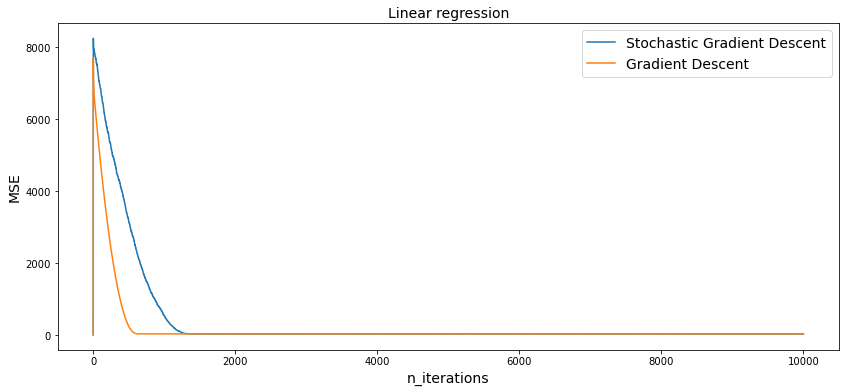

In [7]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear regression', size=14)
plt.plot(errors_St, label='Stochastic Gradient Descent')
plt.plot(errors_gd, label='Gradient Descent')
plt.legend(loc='best', fontsize=14)
plt.xlabel('n_iterations', size=14)
plt.ylabel('MSE', size=14)


Здесь получилось, что градиентному спуску  потребовалось меньше времени на вычисление коэффициентов, чем стохастическому градиентному спуску. При данных условиях, градиентный спуск работает лучше.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [8]:
def mserrorL2(X, w, y_pred, alpha = 0.01):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y)) + (alpha * np.sum(np.square(w)))

In [9]:
def gd_L2(X,
                     y, 
                     mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                             # чтобы он не стемился к нулю
                    ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_GD_L2 = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0] + 2 * alpha * np.sum(w))
        errors_GD_L2.append(mserrorL2(X, new_w, y))
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_GD_L2[-1] - errors_GD_L2[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_GD_L2

In [10]:
def st_L2(X,
              y, 
              mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                      # чтобы он не стемился к нулю
              ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_SGD_L2 = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X[train_ind].T, (np.dot(X[train_ind], w)/
                                                  - y[train_ind])) / y.shape[0]  + 2 * alpha * np.sum(w))

        errors_SGD_L2.append(mserror(X, new_w, y))
        
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_SGD_L2[-1] - errors_SGD_L2[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_SGD_L2



In [11]:
errors_SGD_L2 = st_L2(data, target)
errors_GD_L2 = gd_L2(data, target)

Text(0, 0.5, 'MSE')

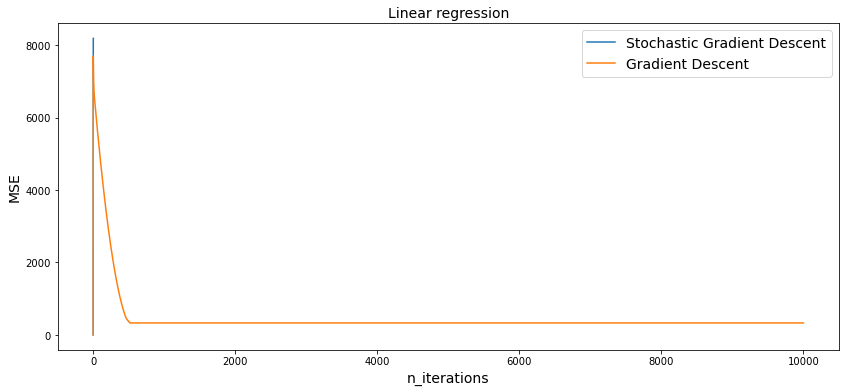

In [12]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear regression', size=14)
plt.plot(errors_SGD_L2, label='Stochastic Gradient Descent')
plt.plot(errors_GD_L2 , label='Gradient Descent')
plt.legend(loc='best', fontsize=14)
plt.xlabel('n_iterations', size=14)
plt.ylabel('MSE', size=14)

Теперь для данного датасета получилось, что скорости сходимости обоих методов практически одинаковы

3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.